
# Linear Regression Example
The example below uses a [marketing](https://scikit-learn.org/stable/datasets/toy_dataset.html) dataset,
in order to illustrate a linear regression activity.

Workflow:



1. Preparation
    1. Load the dataset from a `.csv` file and show a short description
    1. Show the two dimensional scatter plots for all the predicting variables with respect to the target
    1. Split the data into *predicting variables* `X` and *target* `y`
        1. here we set the `random_state` variable to make the experiment *repeatable* 
1. First experiment: compute the regression on a single predicting variable
    1. Consider a reduced dataset containing the chosen variable and the target
    1. Fit the `LinearRegression` estimator on the training set
    1. Show the statistical significance of the fitted model
    1. Predict the target for the test set using the *fitted* estimator
    1. Compute the regression coefficients and the quality measures: *Root Mean Squared Error (RMSE)* and *coefficient of determination (r2)*
1. Second experiment: compute the regression considering all the predicting variables
    1. Repeat the steps from 2.2 to 2.5
1. Third experiment: use the `DecisionTreeRegressor` with the entire dataset
    1. Fit the tree using the default hyperparameters, in order to find the 
    maximum depth of the unconstrained tree
    1. Use *cross-validation* to find the optimal *maximum depth* of the tree
    1. Fit the tree with the optmal `max_depth`
    1. Predict and show the *root mean squared error*
1. Fourth experiment: use the `RandomForestRegressor`
    1. Repeat steps from 4.2 to 4.4 (for simplicity, we use the maximum `max_depth` found in 4.1)


In [8]:
# Code source: Claudio Sartori 
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split

random_state = 94922767 # this will be used to guarantee the repeatability of the experiment

## Load the dataset from a `.xlsx` file and show a short description

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# The file must be available in the same directory, 
# or uploaded in the Colab environment 
# in the execution of the previous cell
data_fn = '/content/drive/MyDrive/ML PER ESAME/FoodUK2014.xlsx'
df0 = pd.read_excel(data_fn)

## Data Exploration and preparation

##### Show a short description of the columns

In [11]:
df0.describe()

,hhsize,adults_n,children_n,totalexp,Year,income,AgeHRP,qmeat,qfish,qfv,xmeat,xfish,xfv,uvmeat,uvfish,uvfv
count,5114.000000,5114.000000,5114.000000,5114.000000,5114.0,5114.000000,5114.000000,4873.000000,3542.000000,5017.000000,4873.000000,3542.000000,5017.000000,4873.000000,3542.000000,5017.000000
mean,2.363707,1.841807,0.521901,519.898868,2014.0,679.542002,53.802698,10.475023,2.146960,25.727801,68.108342,19.635469,58.943391,7.072523,9.934257,2.508315
std,1.244704,0.743052,0.945622,411.543093,0.0,499.596175,16.187912,8.798118,2.034353,18.371345,57.347230,18.725096,44.751694,2.931651,5.485175,1.358023
min,1.000000,0.000000,0.000000,-246.916821,2014.0,0.000000,17.000000,0.086667,0.108333,0.060667,0.195000,0.000000,0.520000,0.357694,0.000000,0.159672
25%,1.000000,1.000000,0.000000,260.598783,2014.0,306.954000,41.000000,4.452500,0.866667,12.222167,29.141668,6.917083,27.148333,5.171614,5.979375,1.760525
50%,2.000000,2.000000,0.000000,426.977227,2014.0,548.086000,54.000000,8.374167,1.625000,22.245817,54.708336,13.736667,49.356667,6.575851,8.804690,2.254208
75%,3.000000,2.000000,1.000000,651.003763,2014.0,925.652500,67.000000,14.005333,2.816667,35.037167,90.480003,26.000000,78.281662,8.295746,12.520942,2.893561
max,9.000000,7.000000,7.000000,5859.877186,2014.0,2134.090000,80.000000,104.589333,41.348362,169.283829,803.465027,194.869995,480.024994,40.000000,46.315834,32.666668


##### Show the nu[testo del link](https://)mber of rows with nulls

It is computed subtracting the number of rows in the dataset without nulls from the original number of rows

In [12]:
df0.shape[0] - df0.dropna().shape[0]

1668

#### Drop rows with nulls

In [13]:
df1 = df0.dropna().copy()
df1.shape

(3446, 20)

##### Data transormation
- Convert the alphanumeric SexHRP into numeric 0 and 1
    - the `sklearn` machine learning procedures work only with numeric predicting
      attributes
- Generate two new columns as ratio of other columns
    - this is suggested by background information

In [14]:
df1['SexHRP']=df1['SexHRP'].apply(lambda x: 0 if (x=='Female') else 1)
df1['qmeat_hhsize_ratio'] = df1['qmeat']/df1['hhsize']
df1['income_hhsize_ratio'] = df1['income']/df1['hhsize']



##### Use only the columns that the experts consider interesting
This is suggested by background information

In [15]:
df = df1[['adults_n', 'children_n', 'SexHRP', 'AgeHRP'
        , 'qmeat_hhsize_ratio', 'income_hhsize_ratio', 'uvmeat']]
display(df)

,adults_n,children_n,SexHRP,AgeHRP,qmeat_hhsize_ratio,income_hhsize_ratio,uvmeat
1,2,2,1,38,1.511250,206.130000,8.813621
2,2,0,1,54,5.890083,135.962500,7.965790
4,3,0,1,64,4.285667,165.346667,5.726323
5,2,2,1,70,8.968250,66.632500,8.451528
7,3,0,1,64,4.079111,134.393333,5.904745
...,...,...,...,...,...,...,...
5109,2,0,1,61,6.774734,339.902500,7.304593
5110,2,0,1,71,3.736525,1067.045000,15.276449
5111,1,0,1,33,0.866667,326.490000,4.125000
5112,1,0,0,70,1.566500,358.680000,9.668050


## Choose the target and split the data into *predicting variables* `X` and *target* `y`

In [16]:
target = 'qmeat_hhsize_ratio'
X = df.drop(target, axis=1)
y = df[target]

## Show the two dimensional scatter plots for all the predicting variables with respect to the target

In [17]:
ncols=3
import math
nrows = math.ceil((df.shape[1]-1)/ncols)
figwidth = ncols * 7
figheigth = nrows*5

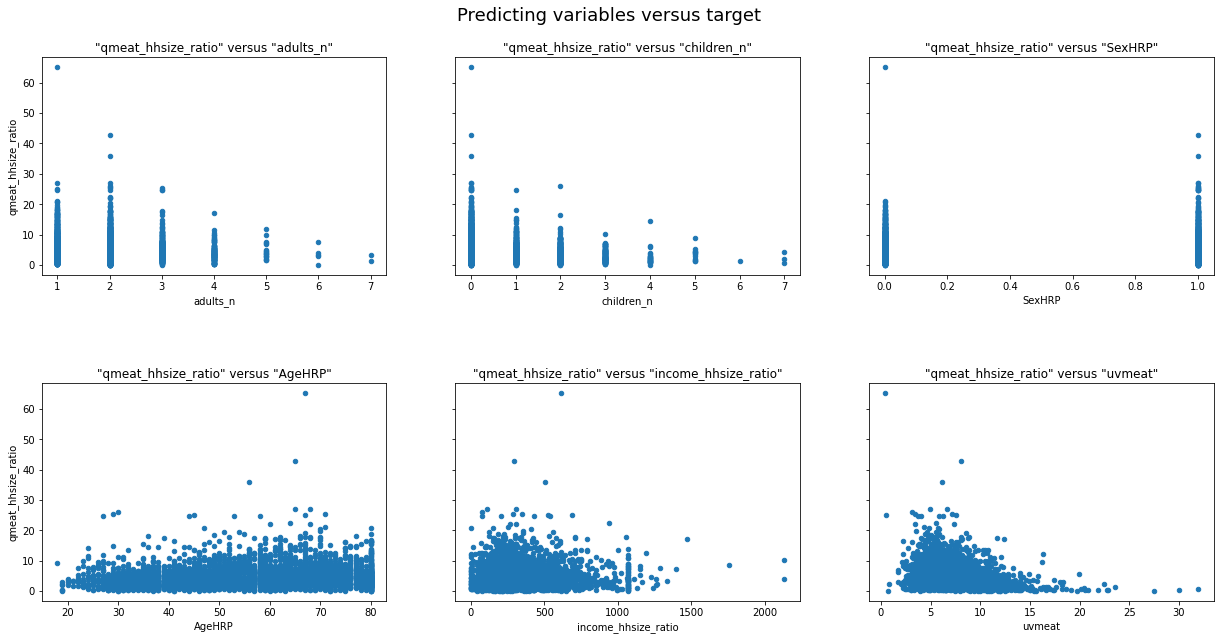

In [18]:
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(figwidth, figheigth),sharey=True)
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Predicting variables versus target", fontsize=18, y=0.95)

for c, ax in zip(df.drop(target,axis=1).columns,axs.ravel()):
    df.sort_values(by=c).plot.scatter(x=c,y=target
                                    , title = '"{}" versus "{}"'.format(target,c)
                                    , ax=ax)

### Show the *_p-values_* of the target with respect to the variables

In [19]:
from sklearn.feature_selection import f_regression
# Your code here
_, p_values = f_regression(X,y)
p_values_show = pd.DataFrame({'Variable': X.columns, 'p-value': p_values})
p_values_show

,Variable,p-value
0,adults_n,1.415945e-05
1,children_n,1.077386e-30
2,SexHRP,8.429827e-02
3,AgeHRP,1.710126e-21
4,income_hhsize_ratio,1.211099e-03
5,uvmeat,4.789746e-52


## Split the data into *train* and *test* and show the sizes of the two parts
Here we set the `random_state` variable to make the experiment *repeatable*


In [20]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state = 1,train_size=0.7)
print(Xtrain.shape,Xtest.shape)

(2412, 6) (1034, 6)


### Consider a reduced dataset containing the chosen variable and the target

In [21]:
newTrain = Xtrain['adults_n'].values.reshape(-1, 1)
newTest = Xtest['adults_n'].values.reshape(-1, 1)

### Fit the `linear_model` estimator on the training set and predict the target for the test set using the *fitted* estimator

In [22]:
model = linear_model.LinearRegression()
model.fit(newTrain,ytrain)
y_test_predicted=model.predict(newTest)

#### Compute the regression coefficients and the quality measures
Create a function to compute the F-statistic and p-value of the regression model

In [23]:
# Computation of F-statistic and p-value for the regression
# http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm
def f_test(y_true, y_pred, n_var, n_obs, sn=.95):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    n = n_obs
    p = n_var+1 # number of regression parameters (coefficients + intercept)
    y_true_m = np.mean(y_true)
    SSM = np.sum((y_pred-y_true_m)**2)
    SST = np.sum((y_true-y_true_m)**2)
    SSE = np.sum((y_true-y_pred)**2)
    DFT = n - 1
    DFM = p - 1 # degrees of freedom for model - numerator
    DFE = n - p # degrees of freedom for error - denominator
    DFT = n - 1
    MSM = SSM / DFM
    MSE = SSE / DFE 
    MST = SST / DFT
    F = MSM / MSE
    p = 1-scipy.stats.f.cdf(F, DFM, DFE) #find p-value of F test statistic 
    return F, p

#### Compute the statistical significance of the model

In [24]:
f_statistic_uni, p_value_uni = f_test(ytest, y_test_predicted
                                    , newTest.shape[1], newTest.shape[0])

# The coefficient
coeff_uni = model.coef_[0] # the coefficient is returned as a one-element list
intercept_uni = model.intercept_
# The root mean squared error
rmse_uni = mean_squared_error(ytest, y_test_predicted, squared=False)
# Coefficient of determination = 1 is perfect prediction
r2_uni = r2_score(ytest, y_test_predicted)

# The results are assembled in a dataframe for a compact view
pd.DataFrame({'Univariate Linear - Value' : [intercept_uni
                        , coeff_uni
                        , rmse_uni
                        , r2_uni
                        , f_statistic_uni
                        , p_value_uni]}
            , index = ['Intercept for "{}"'.format('adults_n')
                     , 'Coefficient for "{}"'.format('adults_n')
                     , 'rmse'
                     , 'r2'
                     , 'f-statistic'
                     , 'p-value'])

,Univariate Linear - Value
"Intercept for ""adults_n""",5.734191
"Coefficient for ""adults_n""",-0.389746
rmse,3.918528
r2,0.004974
f-statistic,6.502927
p-value,0.010913


## Second experiment: compute the regression considering all the predicting variables

### Now we use the entire data in `X_train` and `X_test` for fitting and predicting

In [25]:
linear_multi = linear_model.LinearRegression()
linear_multi.fit(Xtrain, ytrain) 
y_train_pred_multi = linear_multi.predict(Xtrain)
y_test_pred_multi = linear_multi.predict(Xtest)

### Fit, predict and show the results
Now we see the *regression coefficients* resulting from the fitting. 

In particular, *positive coefficients* indicate that the target *increases* with the variable, *negative coefficients* indicate a *decreasing* trend.

The absolute values of the coefficient cannot be considered directly a measure of importance, due to the possibly different orders of magnitude of the data in the different columns (observe above the outputs of `describe`).

In [26]:
pd.DataFrame({'Variable': X.columns, 'Coefficient': linear_multi.coef_})

,Variable,Coefficient
0,adults_n,-0.387928
1,children_n,-0.603711
2,SexHRP,0.345749
3,AgeHRP,0.013208
4,income_hhsize_ratio,0.001322
5,uvmeat,-0.406808


#### Compute the statistical significance

In [27]:
_, p_values = f_regression(Xtrain,y_train_pred_multi)
p_values_show = pd.DataFrame({'Variable': X.columns, 'p-value': p_values})
p_values_show

,Variable,p-value
0,adults_n,2.104348e-26
1,children_n,2.525317e-173
2,SexHRP,2.039205e-07
3,AgeHRP,1.176331e-117
4,income_hhsize_ratio,9.540080e-14
5,uvmeat,0.000000e+00


#### Compute the quality measures

In [28]:
f_statistic, p_value = f_test(ytest, y_test_pred_multi
                                    , newTest.shape[1], newTest.shape[0])

# The coefficient
coeff_uni = model.coef_[0] # the coefficient is returned as a one-element list
intercept_uni = model.intercept_
# The root mean squared error
rmse_multi = mean_squared_error(ytest, y_test_pred_multi, squared=False)
# Coefficient of determination = 1 is perfect prediction
r2 = r2_score(ytest, y_test_predicted)

# The results are assembled in a dataframe for a compact view
pd.DataFrame({'Univariate Linear - Value' : [
                        rmse_multi
                        , r2
                        , f_statistic
                        , p_value]}
            , index = ['rmse'
                     , 'r2'
                     , 'f-statistic'
                     , 'p-value'])

,Univariate Linear - Value
rmse,3.680622e+00
r2,4.973749e-03
f-statistic,1.391155e+02
p-value,1.110223e-16


## Decision Tree Multivariate Regresson

In [29]:
# Create Decision Tree regression object
from sklearn.tree import DecisionTreeRegressor

#### Fit the tree with default hyperparameters, and find the maximum depth of the unconstrained tree

In [31]:
dt = DecisionTreeRegressor(random_state=random_state)
# Train the model using the training set
dt.fit(Xtrain, ytrain);
max_max_depth = dt.tree_.max_depth
print("The maximum depth of the full Decision Tree Regressor is {}".format(max_max_depth))

The maximum depth of the full Decision Tree Regressor is 32


#### Find the optimal value of the hyperparameter `max_depth` with *cross-validation*
The optimization searches for the *maximum tree depth* guaranteing the smallest mean squared error
At the end, this operation returns also the *fitted best tree* `best_estimator_`

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': list(range(1,max_max_depth))}
# create the grid search cross validation object
dt_gscv = GridSearchCV(estimator=DecisionTreeRegressor(random_state=random_state)
                    , param_grid=param_grid
                    , scoring='neg_mean_squared_error' # select model with minimum mse
                    )
dt_gscv.fit(Xtrain,ytrain);
dt_best = dt_gscv.best_estimator_ # the GridSearchCV returns the best estimator
best_max_depth = dt_best.tree_.max_depth
print("The optimal maximum depth for the decision tree is {}".format(best_max_depth))

The optimal maximum depth for the decision tree is 4


#### Show the tree

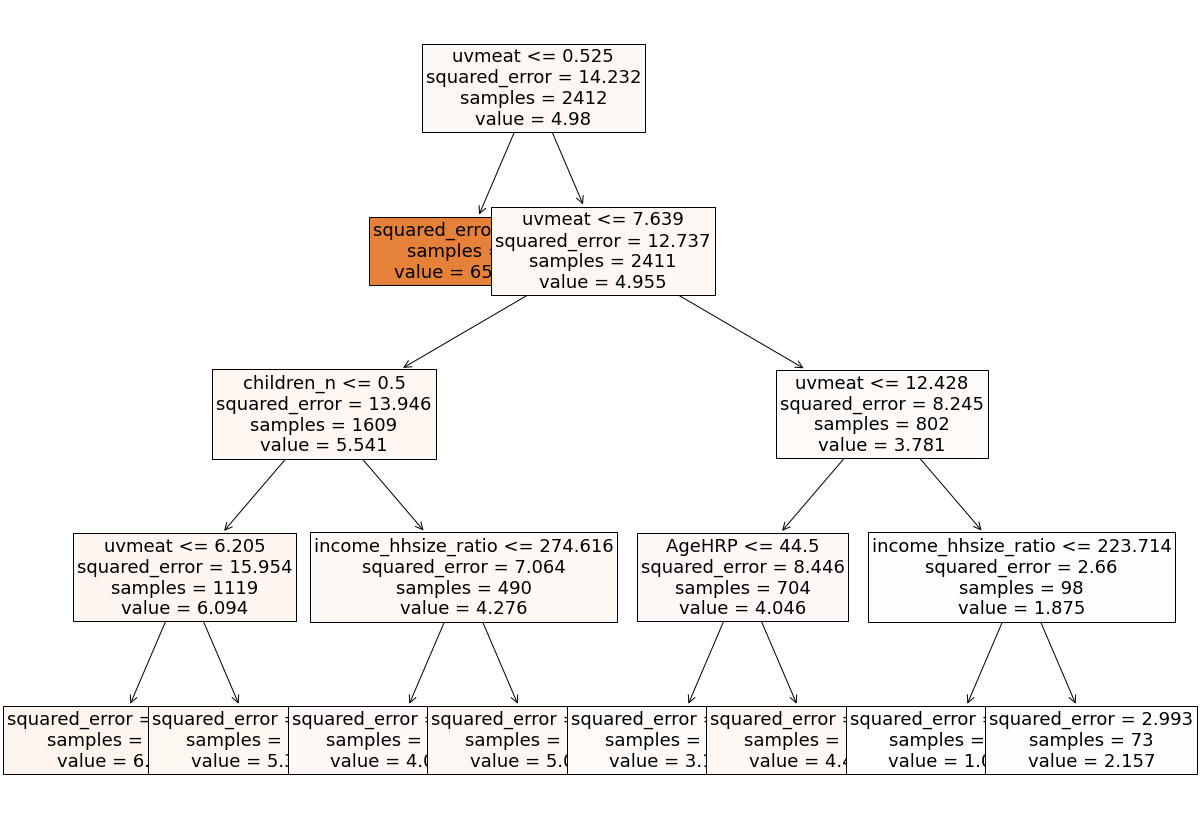

In [33]:
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure
# Your code here
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure
figure(figsize = (20,15))
plot_tree(dt_best
          , filled = True # fills nodes with colors related to classes
                          # darker color means higher purity
          , feature_names = X.columns
          # , max_depth=2
          , fontsize=18
        #   , class_names = df[target].unique()
         );

## Random Forest Multivariate Regresson
Create a Random forest regressor and fit it on the complete dataset.

For simplicity use the max_depth found in the Decision tree regressor to perform a cross validation and find the best depth for this model.

In [35]:
# Create Random Forest regression object
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=random_state)
# for simplicity, we use as a maximum maximum depth of the tree the value found in
# the unconstrained decision tree fitting
param_grid_rf = {'max_depth': list(range(1,max_max_depth))
}
# create the grid search with cross validation
rf_gscv = GridSearchCV(rf, param_grid=param_grid_rf
                        , scoring='neg_mean_squared_error') # look for minimum mean square error

# Train the model using the training set
rf_gscv.fit(Xtrain, ytrain)

# the grid search returns the best estimator
rf = rf_gscv.best_estimator_

In [36]:
print("The optimal maximum depth for the trees in the random forest is {}".format(rf.max_depth))

The optimal maximum depth for the trees in the random forest is 4


In [38]:
y_test_pred_rf = rf.predict(Xtest)
rmse_rf = mean_squared_error(ytest, y_test_pred_rf, squared=False)
print("Random Forest Regression - RMSE = {:.2f}".format(rmse_rf))

Random Forest Regression - RMSE = 3.71


## Final observations
### Linear regression
The multivariate regression with all the predicting variables available with respect to the univariate regression has 
- lower RMSE 
- higher coefficient of determination 
- the p-value suggests the acceptance of both models
### Decision Tree and Random Forest regression
- Decistion Tree has an RMSE slightly higher than multivariate linear regression
- Random Forest has an RMSE slightly lower than multivariate linear regression


## Control questions
1. observing the multi-variate experiment, what variable has the higher effect on the target?
1. is there a variable having an almost negligible effect on the target?
1. try to repeat the univariate experiment with the other two columns and comment the results